In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Explantory Data Analysis

In [4]:
sns.heatmap(train.isnull(), yticklabels = False , cbar =False, cmap='viridis')

<AxesSubplot:>

In [ ]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

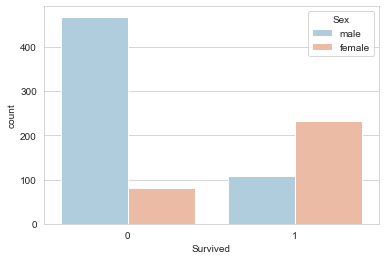

In [ ]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')


<AxesSubplot:xlabel='Survived', ylabel='count'>

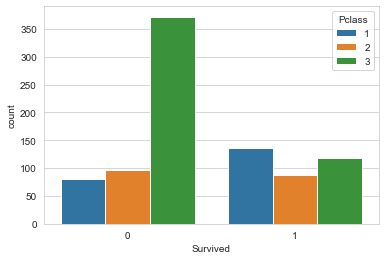

In [ ]:
sns.countplot(x="Survived", data=train, hue='Pclass')

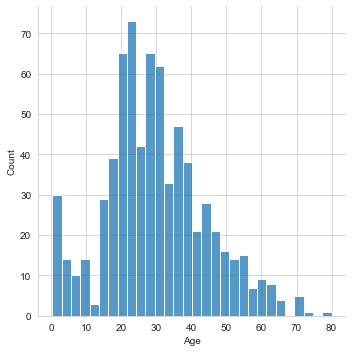

In [ ]:
sns.displot(train['Age'].dropna(), bins = 30)

<AxesSubplot:ylabel='Frequency'>

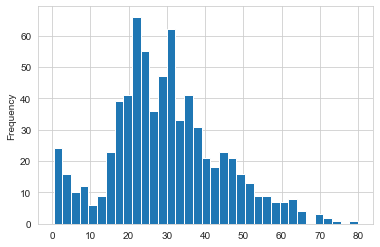

In [ ]:
train['Age'].plot.hist(bins = 35)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

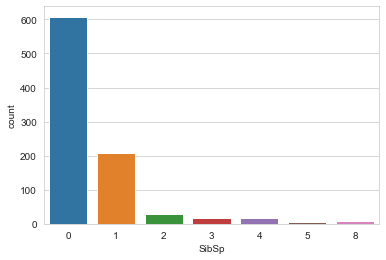

In [ ]:
sns.countplot(x='SibSp', data= train)

<AxesSubplot:ylabel='Frequency'>

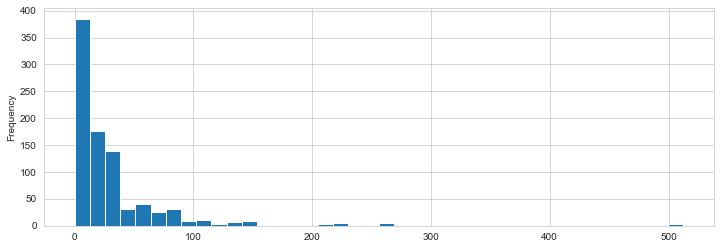

In [ ]:
train['Fare'].plot.hist(bins=40, figsize=(12,4))

In [ ]:
import cufflinks as cf

In [ ]:
cf.go_offline()

In [ ]:
train['Fare'].iplot(kind='hist', bins=50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

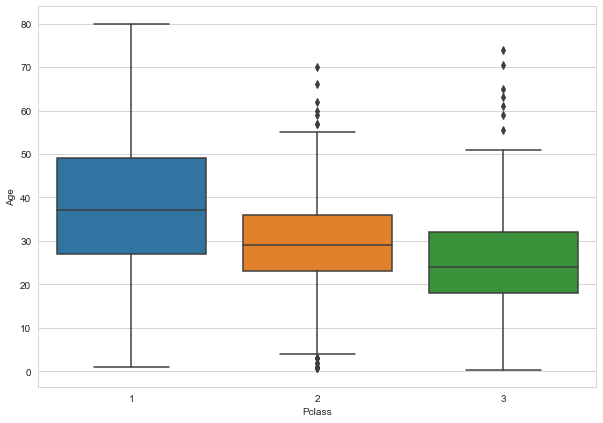

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [ ]:
import plotly.express as px
fig = px.box(train,x="Pclass", y="Age")
fig.show()

# Cleaning our data

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

In [ ]:
train["Age"] = train[["Age","Pclass"]].apply(impute_age, axis = 1)

<AxesSubplot:>

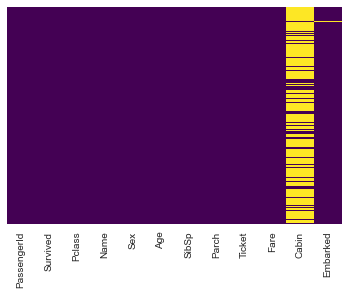

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [ ]:
train.drop('Cabin',axis = 1,  inplace=True)

In [ ]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

<AxesSubplot:>

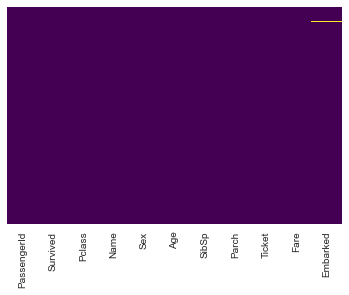

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")


In [ ]:
train.dropna(inplace=True)

In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [ ]:
sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [ ]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [ ]:
train = pd.concat([train, sex, embark], axis= 1)

In [ ]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  
3      0            113803  53.1000        S     0  0  1  
4      0            373450   8.0500        S     1  0  1

In [ ]:
train.drop(['Sex', 'Embarked', 'Name','Ticket'], axis = 1, inplace=True)

In [ ]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [ ]:
train.tail()

PassengerId  Survived  Pclass   Age  SibSp  Parch   Fare  male  Q  S
886          887         0       2  27.0      0      0  13.00     1  0  1
887          888         1       1  19.0      0      0  30.00     0  0  1
888          889         0       3  24.0      1      2  23.45     0  0  1
889          890         1       1  26.0      0      0  30.00     1  0  0
890          891         0       3  32.0      0      0   7.75     1  1  0

In [ ]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

# Loistics regression

In [ ]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression(max_iter=250, solver='lbfgs')


In [ ]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=250)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test, predictions))

[[150  13]
 [ 32  72]]
